# Ionisation

Input:
   * A - The charge number of the target atom.
   * I - The mean excitation of the target atom. 
   * Z - The mass number of the target atom.
   * mu - The projectile rest mass, in GeV
   * K - The projectile initial kinetic energy.
   * q - The kinetic energy lost to the photon.
  
Output:
    DCS in m^2/kg.

### Definitions and Applicability

Theory from: Salvat et al., NIMB316 (2013) 144-159, Sokalski et al., Phys.Rev.D64 (2001) 074015 (MUM)

The differential cross section for ionisation is computed following Salvat et al., NIMB316 (2013) 144-159, considering only close interactions for DELs. In addition a radiative correction is applied according toSokalski et al., Phys.Rev.D64 (2001) 074015 (MUM).
 

\begin{equation}
\frac{\text{d}\sigma}{\text{d}q} = \frac{CEZ}{A(\frac{1}{2P_2} + \frac{P_2W_\text{max}}{E^2W_\text{max} - qP_2})}(1 + \Delta_{e\gamma}),
\end{equation}

where $P_2 = E^2 - M_\mu^2$, $W_{max} = \frac{2m_e P_2}{M_\mu^2 + m_e(m_e + 2E)}$ and $C = 1.535336*10^{-5}$ 

$\Delta_{e\gamma}$ - Radiative correction

\begin{equation}
\Delta_{e\gamma} = \frac{\alpha}{2\pi}\ln(1 + \frac{2\nu E}{m_e})(\ln(\frac{4E^2(1 - \nu)}{M_\mu^2}) - \ln(1 + \frac{2\nu E}{m_e}))
\end{equation}

If we take into account, that $\nu = \frac{q}{E}$

\begin{equation}
\Delta_{e\gamma} = \frac{\alpha}{2\pi}\ln(1 + \frac{2q}{m_e})(\ln(\frac{4E(E - q)}{M_\mu^2}) - \ln(1 + \frac{2q}{m_e}))
\end{equation}

In [ ]:
import math

def dcs_ionisation(A, I, Z, mu, K, q):
    ELECTRON_MASS = 0.510998910E-03
    X_FRACTION = 5E-2

In [ ]:
    P2 = K * (K + 2. * mu)

\begin{equation}
P_2 = K(K + 2M_\mu)
\end{equation}

In [ ]:
    E = K + mu;

In [ ]:
    Wmax = 2. * ELECTRON_MASS * P2 /(mu * mu + ELECTRON_MASS * (ELECTRON_MASS + 2. * E))

\begin{equation}
W_{max} = \frac{2m_e P_2}{M_\mu^2 + m_e(m_e + 2E)}
\end{equation}

In [ ]:
    if ((Wmax < X_FRACTION * K) or (q > Wmax)):
        return 0.
    Wmin = 0.62 * I
    if (q <= Wmin):
        return 0.

Close interactions for Q >> atomic binding energies

In [ ]:
    a0 = 0.5 / P2
    a1 = -1. / Wmax
    a2 = E * E / P2
    cf = 1.535336E-05

In [ ]:
    cs = cf * E * Z / A * (a0 + 1. / q * (a1 + a2 / q))

\begin{equation}
cs =  \frac{\text{cf}*EZ }{A(a_0 + \frac{1}{q(a_1 + a_2/q)})} 
\end{equation}

### Radiative correction

In [ ]:
    Delta = 0.

In [ ]:
    m1 = mu - ELECTRON_MASS;

\begin{equation}
m_1 = M_\mu - m_e
\end{equation}

In [ ]:
    if (K >= 0.5 * m1 * m1 / ELECTRON_MASS):

In [ ]:
            L1 = math.log(1. + 2. * q / ELECTRON_MASS);

\begin{equation}
L_1 = \ln(1 + \frac{2q}{m_e})
\end{equation}

In [ ]:
            Delta = 1.16141E-03 * L1 * (math.log(4. * E * (E - q) / (mu * mu)) - L1)  

\begin{equation}
\Delta_{e\gamma} = \frac{\alpha}{2\pi} L_1 (ln(\frac{4E(E-q)}{M_\mu^2} - L_1)
\end{equation}

$\frac{\alpha}{2\pi} = 1.16141*10^{-3}$

In [ ]:
    return cs * (1. + Delta)


# Usage example

For example take Kinetic Energy (K) is equal to 1. And take recoil energi in range from 5% to 100% of K.

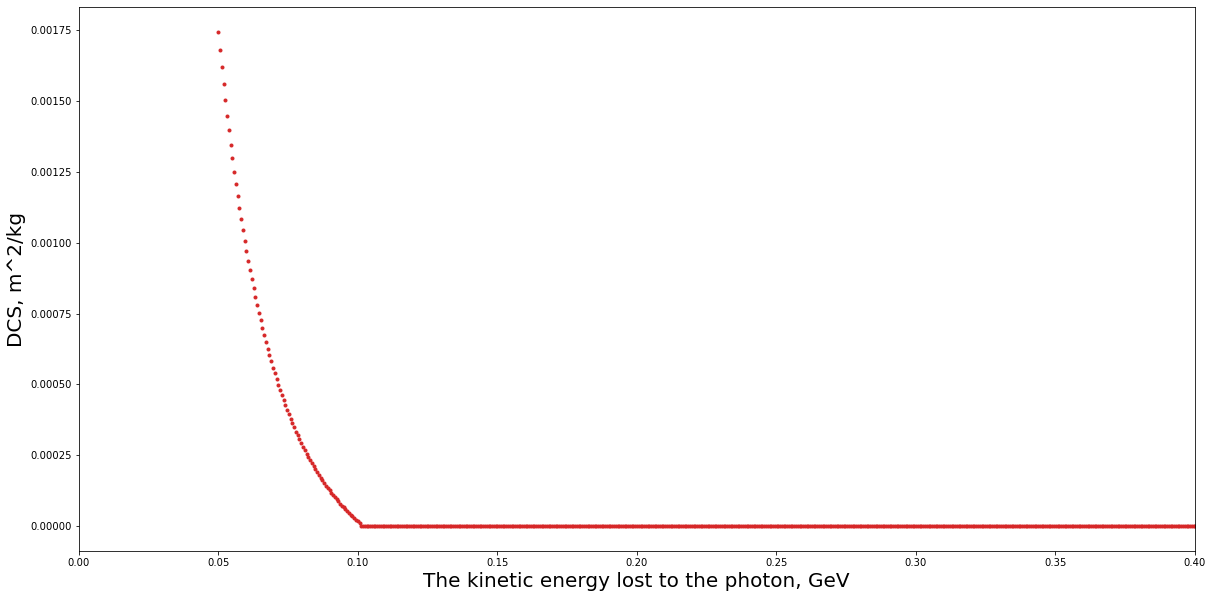

In [7]:
import math
from numba import njit, double, int32

@njit(double(double,double,double,double,double, double))
def dcs_ionisation(A, I, Z, mu, K, q):
    ELECTRON_MASS = 0.510998910E-03
    X_FRACTION = 5E-2
    P2 = K * (K + 2. * mu)
    E = K + mu
    Wmax = 2. * ELECTRON_MASS * P2 /(mu * mu + ELECTRON_MASS * (ELECTRON_MASS + 2. * E))
    if ((Wmax < X_FRACTION * K) or (q > Wmax)):
        return 0.
    Wmin = 0.62 * I
    if (q <= Wmin):
        return 0.
    
    a0 = 0.5 / P2
    a1 = -1. / Wmax
    a2 = E * E / P2
    cs = 1.535336E-05 * E * Z / A * (a0 + 1. / q * (a1 + a2 / q))

    Delta = 0.
    m1 = mu - ELECTRON_MASS;
    if (K >= 0.5 * m1 * m1 / ELECTRON_MASS):
            L1 = math.log(1. + 2. * q / ELECTRON_MASS);
            Delta = 1.16141E-03 * L1 * (math.log(4. * E * (E - q) / (mu * mu)) - L1)        
    return cs * (1. + Delta)


import numpy as np
import matplotlib.pyplot as plt

sample = 1500
X = []
Y = []
for i in range(sample):
    x = 0.05 + i*(1 - 0.05)/sample;
    y = dcs_ionisation(22, 0.1364E-6, 11, 0.10565839, 1, x)
    X.append(x)
    Y.append(y)
    

fig, ax = plt.subplots()
ax.plot(X, Y, '.C3')    
plt.xlim([0.,0.4])

ax.set_xlabel('The kinetic energy lost to the photon, GeV', fontsize = 20)
ax.set_ylabel('DCS, m^2/kg', fontsize = 20)

fig.set_figwidth(20)
fig.set_figheight(10)
    
plt.show()  